In [44]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset                                                                             # Решение 3
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 46.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 57.3MB/s]


In [45]:
import pandas as pd  # Для работы с данными
import matplotlib.pyplot as plt  # Для создания графиков
import seaborn as sns # Для визуализации данных
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

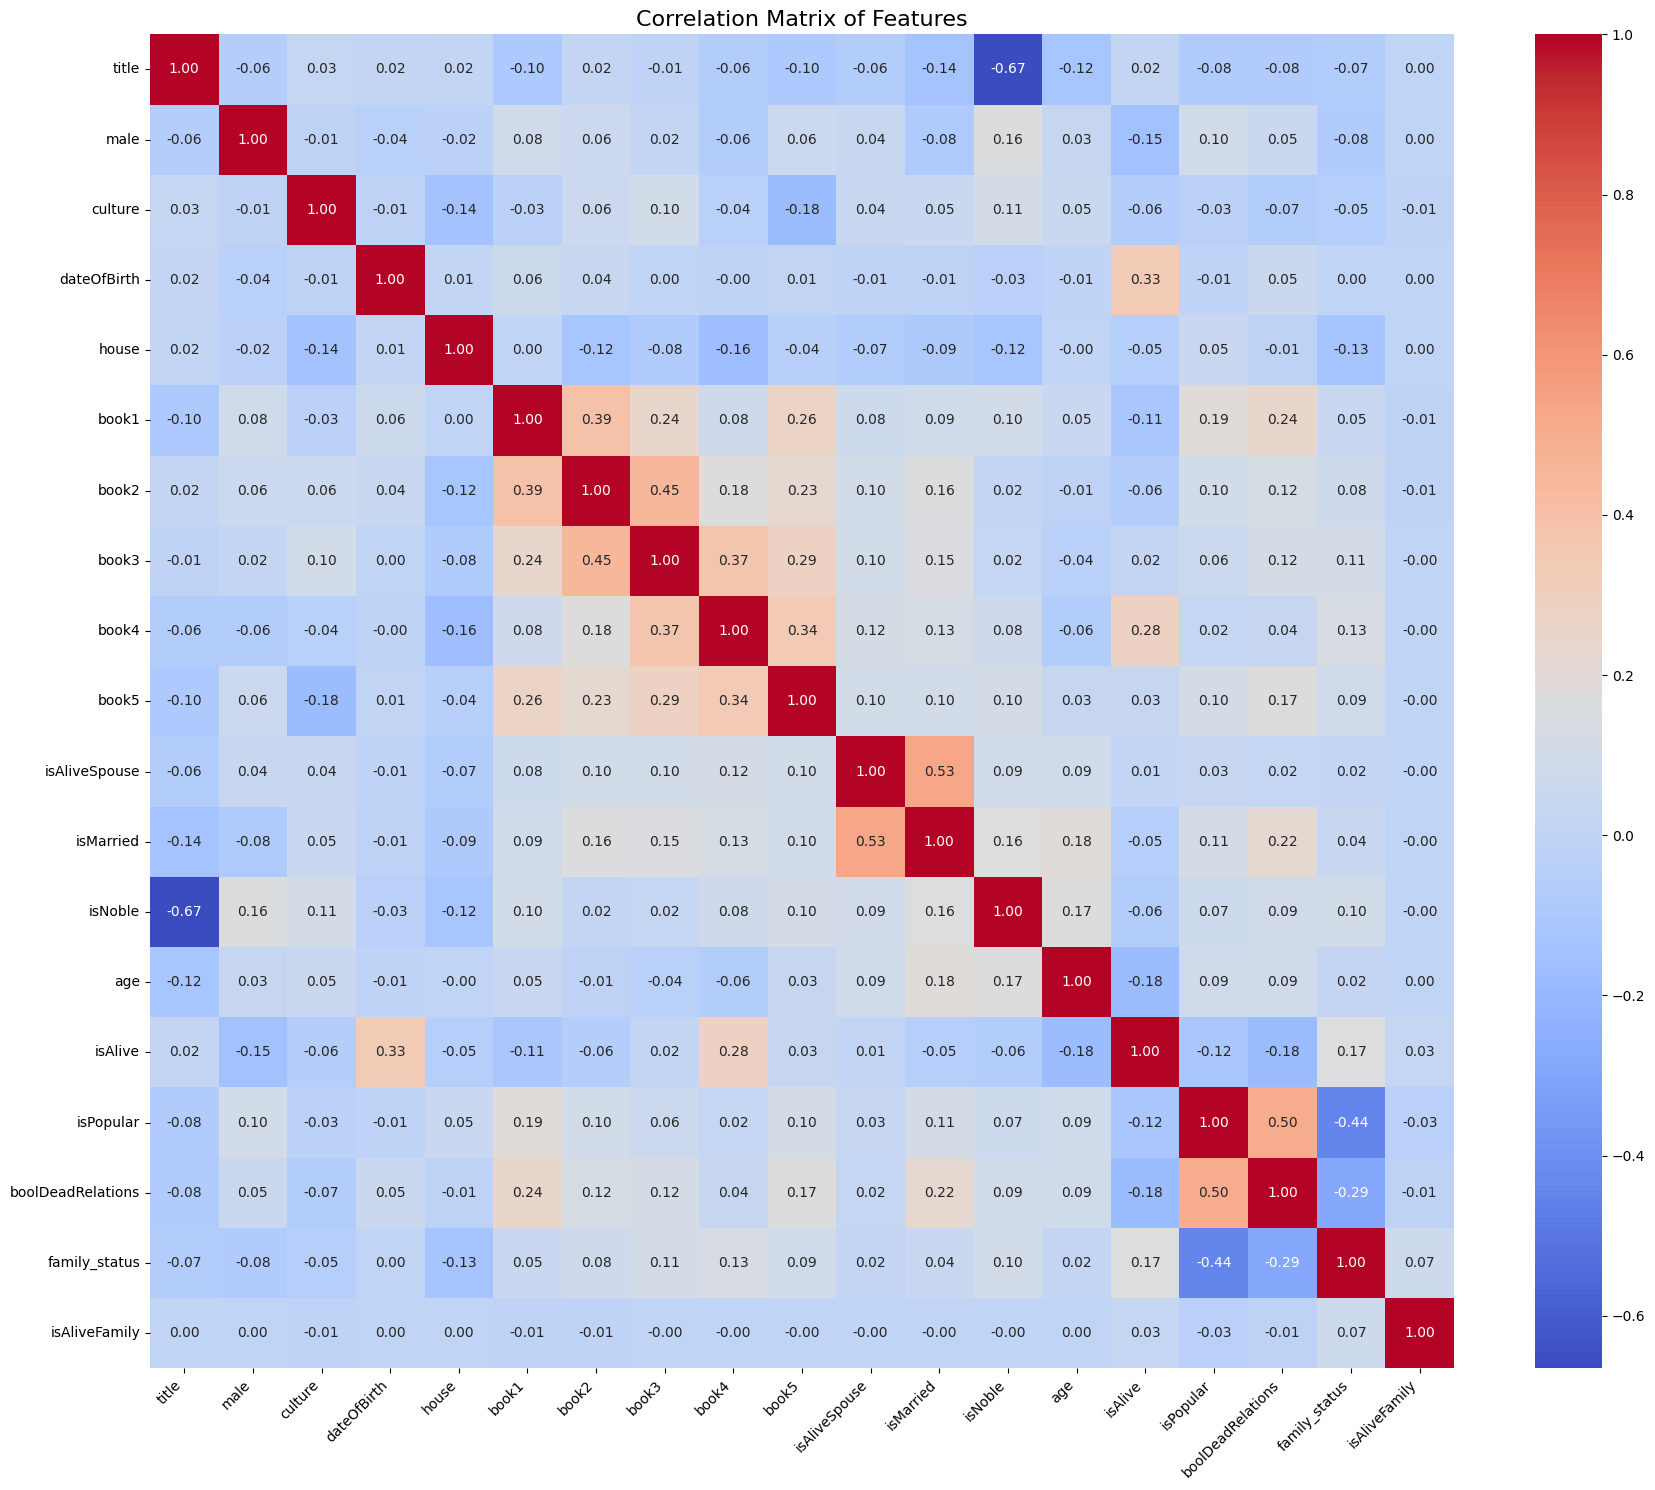

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
train = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')

# Создание копий train и test
train1 = train.copy()
test1 = test.copy()

# Выделение целевой переменной
y = train1['isAlive']
train1.drop('isAlive', axis=1, inplace=True)

# Объединение train и test
data = pd.concat([train1, test1])

# Добавление целевой переменной в data
data['isAlive'] = y

# Заполнение пропущенных значений
data['age'] = data['age'].fillna(data['age'].median())
data['dateOfBirth'] = data['dateOfBirth'].fillna(data['dateOfBirth'].median())

# Замена медианой выбросов в столбце 'age'
data['age'] = data['age'].apply(lambda x: data['age'].median() if x <= 0 or x >= 120 else x)

# Заполнение пропусков в категориальных признаках
features_to_fill = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']
mean_values = data[features_to_fill].mean()
data[features_to_fill] = data[features_to_fill].fillna(mean_values)

# Создание новых признаков
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

# Удаление ненужных столбцов
data.drop(columns=['name', 'numDeadRelations', 'popularity', 'spouse'], inplace=True)

# Преобразование категориальных признаков
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
                       'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations',
                       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir']
label_encoder = LabelEncoder()
for feature in categorical_columns:
    data[feature] = label_encoder.fit_transform(data[feature])

# Масштабирование числовых признаков (без отрицательных значений)
numerical_columns = ['age', 'dateOfBirth']
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Создание новых признаков
data['family_status'] = data[['father', 'mother', 'heir']].mean(axis=1)
data['isAliveFamily'] = data[['isAliveMother', 'isAliveFather', 'isAliveHeir']].mean(axis=1)

# Удаление старых признаков
data.drop(columns=['father', 'mother', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir'], inplace=True)

# Проверка влияния признаков на целевую переменную
corrmat = data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(18, 15))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
data.to_csv('modified_file.csv', index=False)                #гпт отправлю пусть почитает и даст реки

In [47]:
# Фильтр на заполненное значение isAlive (в test-части isAlive отсутствует)
train1 = data[data['isAlive'].notna()]
test1 = data[data['isAlive'].isna()]

# Удаление isAlive из test_data
test1.drop(columns=['isAlive'], inplace=True)

print(f"Train1 данные: {train1.shape}")
print(f"Test1 данные: {test1.shape}")

# Признаки с сильной корреляцией (можно удалить)
# Например, если два признака имеют корреляцию > 0.8, один из них можно удалить
high_corr_features = set()
for i in range(len(corrmat.columns)):
    for j in range(i):
        if abs(corrmat.iloc[i, j]) > 0.8:
            colname = corrmat.columns[i]
            high_corr_features.add(colname)

print(f"Признаки с сильной корреляцией, которые можно удалить: {high_corr_features}")         #Их нет

# Удаление сильно коррелирующих признаков (если необходимо)
train1.drop(columns=high_corr_features, inplace=True)
test1.drop(columns=high_corr_features, inplace=True)

print(f"Train1 данные после удаления коррелирующих признаков: {train1.shape}")
print(f"Test1 данные после удаления коррелирующих признаков: {test1.shape}")

Train1 данные: (1557, 19)
Test1 данные: (389, 18)
Признаки с сильной корреляцией, которые можно удалить: set()
Train1 данные после удаления коррелирующих признаков: (1557, 19)
Test1 данные после удаления коррелирующих признаков: (389, 18)


<ipython-input-47-5b5712db3100>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1.drop(columns=['isAlive'], inplace=True)
<ipython-input-47-5b5712db3100>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.drop(columns=high_corr_features, inplace=True)
<ipython-input-47-5b5712db3100>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1.drop(columns=high_corr_features, inplace=True)


In [ ]:
data.sample(25)

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations,family_status,isAliveFamily
S.No,,,,,,,,,,,,,,,,,,,
1110,262,0,64,0.000992,292,1,1,1,1,1,1,0,0,0.262626,1.0,0,0,19.666667,1.0
1249,216,1,64,0.000992,16,0,0,1,0,0,1,0,0,0.262626,0.0,0,0,19.666667,1.0
395,217,0,64,0.000992,25,0,0,0,1,1,1,0,1,0.262626,1.0,0,0,19.666667,1.0
1820,262,0,7,0.000992,252,1,1,1,1,1,1,0,0,0.262626,NaN,0,0,19.666667,1.0
1715,262,1,30,0.000992,45,0,0,0,0,1,1,0,0,0.262626,NaN,0,0,19.666667,1.0
1908,262,1,57,0.001049,347,1,1,1,0,0,1,0,0,0.121212,NaN,0,0,19.666667,1.0
784,262,1,64,0.000992,347,1,0,0,0,0,1,0,0,0.363636,1.0,0,0,19.666667,1.0
1705,217,1,64,0.001022,279,1,1,1,1,1,2,1,1,0.272727,NaN,0,0,19.666667,1.0
431,189,1,53,0.000761,266,0,0,0,0,0,1,0,1,1.000000,0.0,0,0,19.666667,1.0


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1946 entries, 1 to 1946
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1946 non-null   int64  
 1   male               1946 non-null   int64  
 2   culture            1946 non-null   int64  
 3   dateOfBirth        1946 non-null   float64
 4   house              1946 non-null   int64  
 5   book1              1946 non-null   int64  
 6   book2              1946 non-null   int64  
 7   book3              1946 non-null   int64  
 8   book4              1946 non-null   int64  
 9   book5              1946 non-null   int64  
 10  isAliveSpouse      1946 non-null   int64  
 11  isMarried          1946 non-null   int64  
 12  isNoble            1946 non-null   int64  
 13  age                1946 non-null   float64
 14  isAlive            1557 non-null   float64
 15  isPopular          1946 non-null   int64  
 16  boolDeadRelations  1946 non-n

In [49]:
# Разделение данных на признаки и целевую переменную
X = train1.drop(columns=['isAlive']).values  # Признаки
y = train1['isAlive'].values  # Целевая переменная

# Удаление целевой переменной из данных для предсказания
train1_prediction = train1.drop(columns=['isAlive'])

# Удаление строк с пропущенными значениями в y                                                                 # это гпт сказала написать, но чего-то не уверен что mask тут нужен
mask = ~np.isnan(y)
X = X[mask]
y = y[mask]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение и оценка моделей
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Process': GaussianProcessClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')


Logistic Regression Accuracy: 0.8013
Random Forest Accuracy: 0.7821
AdaBoost Accuracy: 0.8077
Gaussian Process Accuracy: 0.7917
GaussianNB Accuracy: 0.7821
KNeighbors Accuracy: 0.7468
Support Vector Classifier Accuracy: 0.7885
Decision Tree Accuracy: 0.7596


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.47      0.50        77
         1.0       0.83      0.87      0.85       235

    accuracy                           0.77       312
   macro avg       0.69      0.67      0.68       312
weighted avg       0.76      0.77      0.77       312



In [ ]:
data


,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations,family_status,isAliveFamily
S.No,,,,,,,,,,,,,,,,,,,
1,262,1,64,0.000992,347,0,0,0,0,0,1,0,0,0.262626,0.0,1,1,6.666667,0.666667
2,151,1,41,0.000791,116,1,1,1,1,1,2,1,1,0.969697,1.0,1,1,19.666667,1.000000
3,217,1,64,0.000992,264,0,0,0,1,0,1,0,1,0.262626,1.0,0,0,19.666667,1.000000
4,194,0,64,0.000369,23,0,0,0,0,0,0,1,1,0.222222,0.0,0,0,19.666667,1.000000
5,68,0,10,0.001019,237,0,0,0,1,0,2,1,1,0.282828,1.0,0,0,19.666667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,262,1,57,0.000992,252,1,1,1,1,1,1,0,0,0.262626,NaN,0,0,19.666667,1.000000
1943,262,1,64,0.000992,45,0,1,0,1,1,1,0,0,0.262626,NaN,0,0,19.666667,1.000000
1944,262,1,64,0.000992,347,1,1,1,1,1,1,0,0,0.262626,NaN,0,0,19.666667,1.000000


In [50]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF                                                                                                               #файл submission исходный

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 10.9MB/s]


In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

'''# Загрузка данных
data = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')

# Создание копии data для работы чтобы не изменять исходные data
data1 = data.copy()

# Заполнение пропущенных значений
data1['age'] = data1['age'].fillna(data1['age'].median())
data1['dateOfBirth'] = data1['dateOfBirth'].fillna(data1['dateOfBirth'].median())

# Замена медианой выбросов в столбце 'age'
data1['age'] = data1['age'].apply(lambda x: data1['age'].median() if x <= 0 or x >= 120 else x)

# Заполнение пропусков в категориальных признаках
features_to_fill = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']
mean_values = data1[features_to_fill].mean()
data1[features_to_fill] = data1[features_to_fill].fillna(mean_values)

# Создание новых признаков
data1['isPopular'] = data1['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
data1['boolDeadRelations'] = data1['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

# Удаление ненужных столбцов
data1.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace=True)

# Преобразование категориальных признаков
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
                       'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations',
                       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']
label_encoder = LabelEncoder()
for feature in categorical_columns:
    data1[feature] = label_encoder.fit_transform(data1[feature])

# Масштабирование числовых признаков (без отрицательных значений)
numerical_columns = ['age', 'dateOfBirth']
scaler = MinMaxScaler()
data1[numerical_columns] = scaler.fit_transform(data1[numerical_columns])

# Создание новых признаков
data1['family_status'] = data1[['father', 'mother', 'heir']].mean(axis=1)
data1['isAliveFamily'] = data1[['isAliveMother', 'isAliveFather', 'isAliveHeir']].mean(axis=1)

# Удаление старых признаков
data1.drop(columns=['father', 'mother', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir'], inplace=True)

# Проверка влияния признаков на целевую переменную
corrmat = data1.corr()

# Выводим результат
print("DataFrame после преобразования категориальных признаков:")
print(data1.head())'''

# Удаление целевой переменной 'isAlive' из data1 перед предсказанием
test1_prediction = scaler.transform(test1)

# Предсказание на новых данных
for model_name, model in models.items():
    # Предсказание на данных data1_for_prediction
    y_pred = model.predict(test1_prediction)

    # Создание DataFrame с предсказаниями
    y_pred_df = pd.DataFrame(y_pred, columns=['isAlive'])

    # Сохранение предсказаний в файл
    y_pred_df.to_csv(f"/content/new_submission_{model_name.replace(' ', '_')}.csv", index=False)
    print(f"Предсказания модели {model_name} сохранены в new_submission_{model_name.replace(' ', '_')}.csv")

#Или так?

"""    # Удаление целевой переменной 'isAlive' из data1 перед предсказанием
data1_for_prediction = data1.drop(columns=['isAlive'])

# Предсказание на новых данных
for model_name, model in models.items():
    # Предсказание на данных data1_for_prediction
    y_pred = model.predict(data1_for_prediction)

    # Создание DataFrame с предсказаниями
    y_pred_df = pd.DataFrame(y_pred, columns=['isAlive'])

    # Сохранение предсказаний в файл
    y_pred_df.to_csv(f"/content/new_submission_{model_name.replace(' ', '_')}.csv", index=False)
    print(f"Предсказания модели {model_name} сохранены в new_submission_{model_name.replace(' ', '_')}.csv")"""

Предсказания модели Logistic Regression сохранены в new_submission_Logistic_Regression.csv
Предсказания модели Random Forest сохранены в new_submission_Random_Forest.csv
Предсказания модели AdaBoost сохранены в new_submission_AdaBoost.csv
Предсказания модели Gaussian Process сохранены в new_submission_Gaussian_Process.csv
Предсказания модели GaussianNB сохранены в new_submission_GaussianNB.csv
Предсказания модели KNeighbors сохранены в new_submission_KNeighbors.csv
Предсказания модели Support Vector Classifier сохранены в new_submission_Support_Vector_Classifier.csv
Предсказания модели Decision Tree сохранены в new_submission_Decision_Tree.csv


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


'    # Удаление целевой переменной \'isAlive\' из data1 перед предсказанием\ndata1_for_prediction = data1.drop(columns=[\'isAlive\'])\n\n# Предсказание на новых данных\nfor model_name, model in models.items():\n    # Предсказание на данных data1_for_prediction\n    y_pred = model.predict(data1_for_prediction)\n\n    # Создание DataFrame с предсказаниями\n    y_pred_df = pd.DataFrame(y_pred, columns=[\'isAlive\'])\n\n    # Сохранение предсказаний в файл\n    y_pred_df.to_csv(f"/content/new_submission_{model_name.replace(\' \', \'_\')}.csv", index=False)\n    print(f"Предсказания модели {model_name} сохранены в new_submission_{model_name.replace(\' \', \'_\')}.csv")'

In [52]:
test1

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isPopular,boolDeadRelations,family_status,isAliveFamily
S.No,,,,,,,,,,,,,,,,,,
1558,262,0,64,0.000617,40,0,0,0,0,1,1,0,0,1.000000,0,0,19.666667,1.0
1559,262,0,2,0.000992,331,0,1,1,1,1,1,0,0,0.262626,1,0,19.666667,1.0
1560,262,0,64,0.000992,8,0,0,1,1,0,1,0,0,0.262626,0,0,19.666667,1.0
1561,217,1,64,0.000992,275,1,1,1,1,1,1,0,1,0.262626,0,0,19.666667,1.0
1562,262,1,40,0.000972,116,1,1,1,1,1,2,1,0,0.373737,0,0,19.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,262,1,57,0.000992,252,1,1,1,1,1,1,0,0,0.262626,0,0,19.666667,1.0
1943,262,1,64,0.000992,45,0,1,0,1,1,1,0,0,0.262626,0,0,19.666667,1.0
1944,262,1,64,0.000992,347,1,1,1,1,1,1,0,0,0.262626,0,0,19.666667,1.0


In [53]:
# Проверяем наличие NaN
print("\nКоличество NaN в каждой колонке:")
print(data.isnull().sum())


Количество NaN в каждой колонке:
title                  0
male                   0
culture                0
dateOfBirth            0
house                  0
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveSpouse          0
isMarried              0
isNoble                0
age                    0
isAlive              389
isPopular              0
boolDeadRelations      0
family_status          0
isAliveFamily          0
dtype: int64


In [ ]:
"""# Преобразование категориальных признаков с использованием OneHotEncoder                                                                                              #Может это запихнуть в тест?
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_features = one_hot_encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Удаление исходных категориальных признаков и добавление закодированных
data = data.drop(columns=categorical_columns)
data = pd.concat([data, encoded_df], axis=1)

# Масштабирование числовых признаков (без отрицательных значений)
numerical_columns = ['age', 'dateOfBirth']
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])"""

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
"""def train_model(model, grid_params, X_train, X_test, y_train, y_test):                              # GradientBoostingClassifier ниже - лучше
    clf = model()

    grid_model = GridSearchCV(
        clf,
        param_grid=grid_params,
        n_jobs=-1,
        )

    grid_model.fit(X_train, y_train)

    y_pred = grid_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return grid_model, accuracy"""

In [ ]:
"""%%time
my_model = GradientBoostingClassifier
grid = {'n_estimators': [20, 50, 100, 200],
        'learning_rate': [1e-2, .05, 1e-1],
        'subsample': [.9, 1],
        # 'min_samples_split': [2, 4, 6],
        # 'min_samples_leaf': [1, 3, 5],
        'max_depth': [3, 5, 7],
        }

grid_model, grid_accuracy = train_model(my_model, grid, X_train, X_test, y_train, y_test)"""

CPU times: user 41.7 s, sys: 892 ms, total: 42.6 s
Wall time: 3min 40s


In [ ]:
#grid_accuracy

0.8141025641025641

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Разделение данных на признаки и целевую переменную
X = train1.drop(columns=['isAlive']).values  # Признаки
y = train1['isAlive'].values  # Целевая переменная

# Удаление строк с пропущенными значениями в y
mask = ~np.isnan(y)
X = X[mask]
y = y[mask]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Масштабирование данных (если необходимо)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Определение модели и сетки гиперпараметров
model = GradientBoostingClassifier()
grid_params = {
    'n_estimators': [20, 50, 100, 200],
    'learning_rate': [1e-2, 0.05, 1e-1],
    'subsample': [0.9, 1],
    'max_depth': [3, 5, 7],
}

# Создание и обучение GridSearchCV
grid_model = GridSearchCV(
    model,
    param_grid=grid_params,
    scoring='accuracy',  # Метрика для оценки
    cv=5,  # Количество фолдов для кросс-валидации
    n_jobs=-1,  # Использование всех ядер процессора
    verbose=1  # Вывод информации о процессе
)

# Обучение модели на обучающей выборке
grid_model.fit(X_train_scaled, y_train)

# Оценка модели на тестовой выборке
y_pred = grid_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Вывод результатов
print(f"Лучшие параметры: {grid_model.best_params_}")
print(f"Точность на тестовой выборке: {accuracy:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Лучшие параметры: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}
Точность на тестовой выборке: 0.8109


In [40]:
# Масштабирование тестовых данных
test1_scaled = scaler.transform(test1)

# Предсказание на новых данных
y_pred_test = grid_model.predict(test1_scaled)

# Сохранение предсказаний в файл
y_pred_df = pd.DataFrame(y_pred_test, columns=['isAlive'])
y_pred_df.to_csv("/content/new_submission_grid_search.csv", index=False)
print("Предсказания сохранены в new_submission_grid_search.csv")

Предсказания сохранены в new_submission_grid_search.csv


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
final_pred = grid_model.predict(test1_prediction)

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF                                                                                                        #файл submission исходный

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.93MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission['isAlive'] = final_pred

In [ ]:
submission.to_csv("/content/new_submission_Gradient.csv", index=False)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [ ]:
print(data.columns)

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity'],
      dtype='object')


In [55]:
df = data

              male  dateOfBirth        book1        book2        book3  \
count  1557.000000   279.000000  1557.000000  1557.000000  1557.000000   
mean      0.590880   247.551971     0.138728     0.327553     0.431599   
std       0.491829    61.550441     0.345774     0.469472     0.495458   
min       0.000000   -25.000000     0.000000     0.000000     0.000000   
25%       0.000000   241.000000     0.000000     0.000000     0.000000   
50%       1.000000   272.000000     0.000000     0.000000     0.000000   
75%       1.000000   286.000000     0.000000     1.000000     1.000000   
max       1.000000   299.000000     1.000000     1.000000     1.000000   

             book4        book5  isAliveMother  isAliveFather  isAliveHeir  \
count  1557.000000  1557.000000      18.000000      22.000000    21.000000   
mean      0.562620     0.330122       0.666667       0.227273     0.666667   
std       0.496223     0.470408       0.485071       0.428932     0.483046   
min       0.000000   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy: 0.8577
              Feature  Importance
12              book4   13.171721
3         dateOfBirth   11.243043
7               house   10.767570
1                male    9.923806
2             culture    8.316500
11              book3    7.888413
10              book2    7.298259
0               title    7.238156
13              book5    6.399586
19            isNoble    5.531442
20                age    3.345887
9               book1    2.742540
8              spouse    1.296864
22  boolDeadRelations    1.249738
18          isMarried    1.144065
17      isAliveSpouse    0.962048
5              father    0.554741
21          isPopular    0.324449
6                heir    0.212269
15      isAliveFather    0.170841
16        isAliveHeir    0.147393
4              mother    0.052765
14      isAliveMother    0.017904


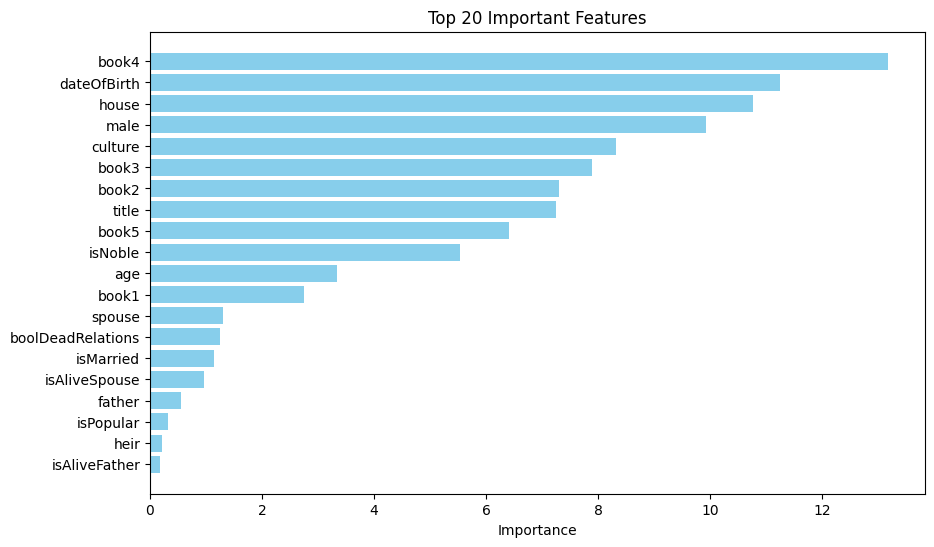

DataFrame после преобразования категориальных признаков:
         title      male   culture  dateOfBirth    mother    father  \
S.No                                                                  
1     0.630132  0.832101  0.094070   247.551971 -4.827108 -7.906025   
2    -0.943797  0.832101  1.448846   208.000000  0.095480  0.104771   
3     0.012514  0.832101  0.094070   247.551971  0.095480  0.104771   
4    -0.346102 -1.201778  0.094070    82.000000  0.095480  0.104771   
5    -2.179032 -1.201778 -2.163890   276.000000  0.095480  0.104771   

           heir     house    spouse     book1  ...  isAliveMother  \
S.No                                           ...                  
1    -14.580816  1.085096  0.323076 -0.401340  ...      -6.508630   
2      0.102320 -0.982695 -1.099455  2.491653  ...       0.101896   
3      0.102320  0.389205  0.323076 -0.401340  ...       0.101896   
4      0.102320 -1.827706  0.049512 -0.401340  ...       0.101896   
5      0.102320  0.140672 -3.23

In [43]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE  # Импорт SMOTE для балансировки классов
import matplotlib.pyplot as plt

                                                                                      #можно доработать, но зачем если уже решено в др. файле
# Загружаем датасет из CSV-файла
# Указываем параметр index_col, чтобы использовать столбец 'S.No' в качестве индекса строк
df = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

# Проверка данных
print(df.describe())

# Создаем признак isPopular
df['isPopular'] = df['popularity'].apply(lambda x: 1 if x > 0.5 else 0)

# Создаем признак boolDeadRelations
df['boolDeadRelations'] = df['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

# Приведение столбца 'culture' к нижнему регистру
df["culture"] = df["culture"].astype(str).apply(lambda x: x.lower() if not x.startswith('nan') else x)

# Удаление ненужных столбцов
df.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace=True)

# Список категориальных признаков
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
                       'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations',
                       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем категориальные признаки в числа
for feature in categorical_columns:
    if feature in df.columns:  # Проверка наличия столбца
        df[feature] = label_encoder.fit_transform(df[feature].astype(str))

# Масштабирование числовых признаков
scaler = StandardScaler()
df[categorical_columns] = scaler.fit_transform(df[categorical_columns])

# Заполнение пропусков средними значениями в остальных признаках
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Разделение на признаки и целевую переменную
X = df.drop(columns=['isAlive'])
y = df["isAlive"]

# Балансировка классов с использованием SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.2)

# Создание и обучение модели CatBoost
cat = CatBoostClassifier(silent=True)
cat.fit(X_train, y_train)

# Предсказание и оценка точности
y_pred = cat.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.4f" % accuracy)

# Вычисление важности признаков
feature_importances = cat.get_feature_importance()

# Получение имен признаков
feature_names = X.columns

# Создание DataFrame для удобства
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Сортировка по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Вывод важности признаков
print(importance_df)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Important Features')
plt.gca().invert_yaxis()  # Инвертировать ось Y для лучшего отображения
plt.show()

# Выводим результат
print("DataFrame после преобразования категориальных признаков:")
print(df.head())

# Вывод информации о DataFrame
print(df.info())

import numpy as np
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Загрузка тестовых данных
test = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')

# Преобразование категориальных признаков
test['isPopular'] = test['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
test['boolDeadRelations'] = test['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
test["culture"] = test["culture"].astype(str).apply(lambda x: x.lower() if not x.startswith('nan') else x)

# Удаление ненужных столбцов
test.drop(columns=['name', 'numDeadRelations', 'popularity'], inplace=True)

# Список категориальных признаков
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
                       'book4', 'book5', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations',
                       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'mother', 'father', 'heir', 'spouse']

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем категориальные признаки в числа
for feature in categorical_columns:
    if feature in test.columns:  # Проверка наличия столбца
        test[feature] = label_encoder.fit_transform(test[feature].astype(str))

# Масштабирование числовых признаков
scaler = StandardScaler()
test[categorical_columns] = scaler.fit_transform(test[categorical_columns])

# Заполнение пропусков средними значениями в остальных признаках
numerical_cols = test.select_dtypes(include=np.number).columns
for col in numerical_cols:
    test[col] = test[col].fillna(test[col].mean())

# Предсказание с использованием обученной модели
y_pred = cat.predict(test)

# Создание DataFrame для сохранения результатов
y_pred_df = pd.DataFrame(y_pred, columns=['isAlive'])

# Сохранение результатов в файл
y_pred_df.to_csv("/content/new_submission_cat.csv", index=False)

# Вывод первых строк результата
print(y_pred_df.head())